# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [27]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
city_number = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []



## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

##? how did it know to get 612 cities when the commented out code is in use?

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#below is so I do not go over the rate limits
#cities = ['Kovūr','Mar del Plata','Barrow']
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)



628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
for city in cities[:50]:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    print (query_url)

    try:
        
        #get data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print (weather_json)
        city_number.append(weather_json['id'])
        city_name.append(weather_json['name'])
        latitude.append(weather_json['coord']['lon'])
        temperature.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])

    except:
        
        print("city not found")





http://api.openweathermap.org/data/2.5/weather?appid=a9cd3775da94217c65921621a995f7d6&q=nizhneyansk
{'cod': '404', 'message': 'city not found'}
city not found
http://api.openweathermap.org/data/2.5/weather?appid=a9cd3775da94217c65921621a995f7d6&q=esperance
{'coord': {'lon': 121.9, 'lat': -33.8667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 288.15, 'feels_like': 287.68, 'temp_min': 288.15, 'temp_max': 288.15, 'pressure': 1008, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1612904775, 'sys': {'type': 1, 'id': 9525, 'country': 'AU', 'sunrise': 1612905770, 'sunset': 1612954234}, 'timezone': 28800, 'id': 2071860, 'name': 'Esperance', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=a9cd3775da94217c65921621a995f7d6&q=busselton
{'coord': {'lon': 115.3333, 'lat': -33.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast cloud

{'coord': {'lon': -159.319, 'lat': 22.0752}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 294.65, 'feels_like': 288.3, 'temp_min': 294.26, 'temp_max': 295.15, 'pressure': 1018, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 20}, 'clouds': {'all': 1}, 'dt': 1612904777, 'sys': {'type': 1, 'id': 7873, 'country': 'US', 'sunrise': 1612890712, 'sunset': 1612931476}, 'timezone': -36000, 'id': 5848280, 'name': 'Kapaa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=a9cd3775da94217c65921621a995f7d6&q=severo-kurilsk
{'coord': {'lon': 156.125, 'lat': 50.6789}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 269.67, 'feels_like': 260.25, 'temp_min': 269.67, 'temp_max': 269.67, 'pressure': 986, 'humidity': 95, 'sea_level': 986, 'grnd_level': 985}, 'visibility': 2306, 'wind': {'speed': 9.86, 'deg': 254}, 'snow

{'coord': {'lon': -53.4616, 'lat': -33.6971}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 295.63, 'feels_like': 295.5, 'temp_min': 295.63, 'temp_max': 295.63, 'pressure': 1015, 'humidity': 75, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.07, 'deg': 115}, 'clouds': {'all': 0}, 'dt': 1612904778, 'sys': {'country': 'UY', 'sunrise': 1612861443, 'sunset': 1612909932}, 'timezone': -10800, 'id': 3443061, 'name': 'Chui', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=a9cd3775da94217c65921621a995f7d6&q=moerai
{'coord': {'lon': -151.3333, 'lat': -22.4333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 300.51, 'feels_like': 300.99, 'temp_min': 300.51, 'temp_max': 300.51, 'pressure': 1015, 'humidity': 66, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 

{'coord': {'lon': 147.3294, 'lat': -42.8794}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 283.63, 'feels_like': 281.15, 'temp_min': 281.48, 'temp_max': 284.82, 'pressure': 1021, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1612904780, 'sys': {'type': 1, 'id': 9545, 'country': 'AU', 'sunrise': 1612898695, 'sunset': 1612949102}, 'timezone': 39600, 'id': 2163355, 'name': 'Hobart', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=a9cd3775da94217c65921621a995f7d6&q=koboldo
{'cod': '404', 'message': 'city not found'}
city not found
http://api.openweathermap.org/data/2.5/weather?appid=a9cd3775da94217c65921621a995f7d6&q=thompson
{'coord': {'lon': -97.8558, 'lat': 55.7435}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 244.15, 'feels_like': 237.37, 'temp_min': 

In [52]:
print(city_name, city_number, latitude, temperature, humidity, cloudiness, wind_speed)

['Esperance', 'Busselton', 'Auki', 'Mataura', 'Sabaudia', 'Suleja', 'Nizwá', 'Castro', 'Ilulissat', 'Beloha', 'Malanje', 'Kapaa', "Severo-Kuril'sk", 'Vung Tau', 'Olinda', 'Hong Kong', 'Jamestown', 'Diplo', 'La Ronge', 'Najrān', 'Punta Arenas', 'Cidreira', 'Port Lincoln', 'Troitskoye', 'Chui', 'Moerai', 'Mogadishu', 'Mahébourg', 'Hilo', 'Ukiah', 'Clyde River', 'Albany', 'Marzuq', 'Ancud', 'Dondo', 'Hermanus', 'Ribeira Grande', 'Xishan', 'Hobart', 'Thompson', 'Cape Town', 'Hasaki', 'Hithadhoo', 'Taoudenni', 'Esperance', 'Busselton', 'Auki', 'Mataura', 'Sabaudia', 'Suleja', 'Nizwá', 'Castro', 'Ilulissat', 'Beloha', 'Malanje', 'Kapaa', "Severo-Kuril'sk", 'Vung Tau', 'Olinda', 'Hong Kong', 'Jamestown', 'Diplo', 'La Ronge', 'Najrān', 'Punta Arenas', 'Cidreira', 'Port Lincoln', 'Troitskoye', 'Chui', 'Moerai', 'Mogadishu', 'Mahébourg', 'Hilo', 'Ukiah', 'Clyde River', 'Albany', 'Marzuq', 'Ancud', 'Dondo', 'Hermanus', 'Ribeira Grande', 'Xishan', 'Hobart', 'Thompson', 'Cape Town', 'Hasaki', 'Hith

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
city_results = pd.DataFrame({"City Name" : city_name,
                              "City Number": city_number,
                              "Latitude" : latitude,
                              "Temperature" : temperature,
                              "Humidity" : humidity,
                              "Cloudiness" : cloudiness,
                              "Wind Speed" : wind_speed})

city_results.to_csv("City Results", encoding = "utf-8", index = False)

In [54]:
city_results

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Esperance,2071860,121.9000,288.15,82,0,1.54
1,Busselton,2075265,115.3333,285.37,98,91,5.23
2,Auki,2109701,160.7034,299.86,86,58,4.96
3,Mataura,6201424,168.8643,282.81,95,100,2.93
4,Sabaudia,3168764,13.0282,285.90,76,98,1.79
...,...,...,...,...,...,...,...
83,Thompson,6165406,-97.8558,244.15,57,75,4.12
84,Cape Town,3369157,18.4232,294.26,78,0,10.80
85,Hasaki,2112802,140.8333,274.15,55,20,3.60
86,Hithadhoo,1282256,73.0833,301.20,78,74,4.85


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
#how to get the indices?  .iloc
#  Get the indices of cities that have humidity over 100%.
humid_cities = []
####update to 100%
#get a list of cities that have humidity < 100
humid_cities = city_results[city_results["Humidity"] > 100].index

print(humid_cities)


Int64Index([], dtype='int64')


In [56]:
clean_city_data = city_results.drop(humid_cities,inplace = False)

clean_city_data

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Esperance,2071860,121.9000,288.15,82,0,1.54
1,Busselton,2075265,115.3333,285.37,98,91,5.23
2,Auki,2109701,160.7034,299.86,86,58,4.96
3,Mataura,6201424,168.8643,282.81,95,100,2.93
4,Sabaudia,3168764,13.0282,285.90,76,98,1.79
...,...,...,...,...,...,...,...
83,Thompson,6165406,-97.8558,244.15,57,75,4.12
84,Cape Town,3369157,18.4232,294.26,78,0,10.80
85,Hasaki,2112802,140.8333,274.15,55,20,3.60
86,Hithadhoo,1282256,73.0833,301.20,78,74,4.85


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

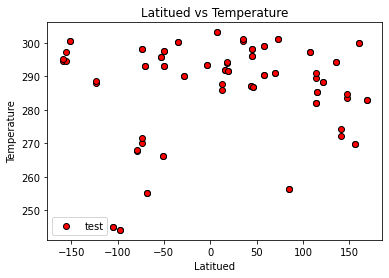

In [57]:
Latitude = clean_city_data["Latitude"]
Temperature = clean_city_data["Temperature"]
##? when to use plt.scatter and when to use df.plot?

#using matplotlib
plt.scatter(Latitude, Temperature, marker="o", facecolors="red", edgecolors="black")
plt.legend(["test"])
plt.xlabel('Latitued')
plt.ylabel('Temperature')
plt.title(('Latitued vs Temperature'))
#            #s=x_axis, alpha=0.75)


plt.show()

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

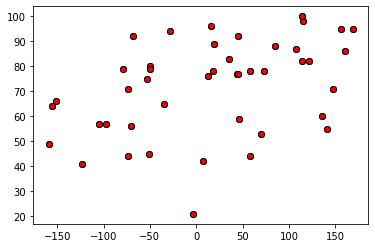

In [58]:
Latitude = clean_city_data["Latitude"]
Humidity = clean_city_data["Humidity"]
##?how do I decide which goes first - latitued or humidity 
plt.scatter(Latitude, Humidity, marker="o", facecolors="red", edgecolors="black")
            #s=x_axis, alpha=0.75)
    
plt.show

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [59]:
#the starter code had from scipy.stats import linregress

w_slope, w_intercept, w_cap_r, w_cap_p, w_cap_std_err = linregress(Latitude, Humidity)


print(w_slope)

0.08298683343660153


In [60]:
#function
# Add the linear regression equation and line to plot
def find_lin_reg(x_values, y_values, title, cordinates):
#x_values = housing_data['RM']
#y_values = housing_data['MEDV']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,cordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()

In [61]:
northern_data = clean_city_data.loc[clean_city_data["Latitude"]>= 0]
southern_data = clean_city_data.loc[clean_city_data["Latitude"]< 0]
southern_data

,City Name,City Number,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
7,Castro,3466704,-50.0119,293.06,80,100,3.03
8,Ilulissat,3423146,-51.1000,266.15,45,0,5.66
11,Kapaa,5848280,-159.3190,294.65,49,1,9.26
14,Olinda,3393536,-34.8553,300.15,65,20,4.12
16,Jamestown,5122534,-79.2353,267.79,79,90,2.57
18,La Ronge,6050066,-105.2842,245.15,57,75,7.72
20,Punta Arenas,3874787,-70.9167,293.15,56,0,4.12
21,Cidreira,3466165,-50.2056,297.45,79,1,7.86
24,Chui,3443061,-53.4616,295.63,75,0,4.07
25,Moerai,4034188,-151.3333,300.51,66,25,4.90


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

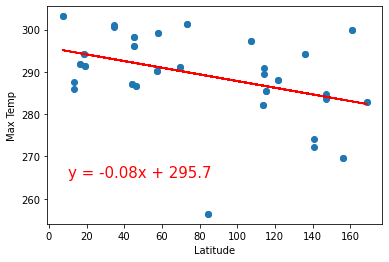

In [62]:
x_values = northern_data["Latitude"]
y_values = northern_data["Temperature"]

find_lin_reg(x_values, y_values,'Max Temp', (10,265))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

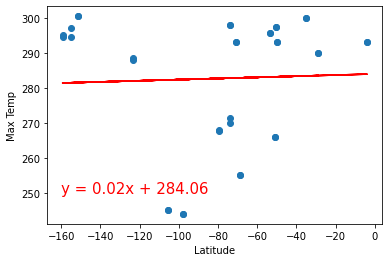

In [66]:
x_values = southern_data["Latitude"]
y_values = southern_data["Temperature"]

find_lin_reg(x_values, y_values,'Max Temp', (-160,250))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression